# 📘 Mean Reverting Portfolio (MRP) Strategy

## 🎯 Goal of This Notebook

This notebook implements a **Mean Reverting Portfolio (MRP) strategy** using statistical arbitrage across multiple stock pairs. The objective is to determine whether an optimized portfolio of mean-reverting pairs can generate consistent profits during the test period (2013-2016) based on relationships established in the training period (2007-2012).

## 📈 What is Mean Reverting Portfolio Trading?

**MRP Strategy** is an advanced statistical arbitrage approach that:
1. Identifies **groups of assets** with cointegrating relationships
2. Constructs an **optimized portfolio** of these pairs
3. Uses **mean-reversion principles** to generate trading signals

### 🔄 Strategy Core Mechanism:
1. **Pair Selection**:
   - Uses both fundamental categories and OPTICS clustering
   - Identifies stocks with long-term equilibrium relationships

2. **Portfolio Optimization** (via MM Algorithm):
   - Maximizes mean-reversion strength (U(w))
   - Maximizes Return profile (R(w))
   - Enforces strategic sparsity (S(w))

3. **Trading Execution**:
   - When spreads diverge → Open positions (long undervalued/short overvalued)
   - When spreads converge → Close positions
   - Continuously monitors portfolio weights

## 🧪 Notebook Workflow:


1. **Pair Identification**:
   - Loads pre-computed pairs from:
     - Fundamental categories (`pairs_category`)
     - OPTICS clustering (`pairs_OPTICS`)
   - Combines statistical and fundamental relationships
2. **Portfolio Optimization**:
   - Balances three key criteria:
     - Mean-reversion strength
     - Return criterion
     - Portfolio sparsity
   - Computes optimal weights using MM algorithm
   - Saves optimal weights dictionary

---

## **0. Initial Setup: Imports & Config**

This section imports essential libraries:

- `numpy`, `pandas`: Data handling
- `matplotlib`: Visualization
- `pickle`: File handling
- `sys`: System operations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys

## Portfolio Optimization with `MeanRevertingPortfolio`

The `MeanRevertingPortfolio` class implements an advanced optimization framework for constructing mean-reverting portfolios using the Majorization-Minimization (MM) algorithm. It transforms pairs of cointegrated assets into an optimally weighted portfolio that maximizes mean-reversion while controlling risk and sparsity.

### Core Functionality
**Matrix Transformation System**
- `create_transformation_matrix()`: Builds the B matrix mapping pairs to assets
- `generate_matrices()`: Computes auto-covariance matrices for spread series

**Objective Function Components**
- `U()`: Mean-reversion strength metric
- `R()`: Return regularization term  
- `S()`: Sparsity enforcement function

**Optimization Engine**
- `surrogate_*()`: Majorization functions for each component
- `projected_gradient_descent()`: Core MM algorithm implementation
- `optimize_pair_weights()`: Full optimization pipeline

### Main Methods

1. `create_transformation_matrix(pairs_data)`

   
Constructs the B matrix that transforms individual assets into pair spreads.

3. `generate_matrices(pairs_data, max_lag=5)`

   
Computes lagged auto-covariance matrices for spread series.

5. `optimize_pair_weights(pairs_data, params=None, ...)`
   
Main optimization workflow with cleaning and normalization.


In [2]:
sys.path.append('/Users/zahraaghaei/Desktop/PairsTrading_master/notebooks/classes')
%load_ext autoreload
%aimport DataProcessor, MRP
%autoreload 1

# Create an instance of the DataProcessor and MRP
processor = DataProcessor.DataProcessor()
portfolio = MRP.MeanRevertingPortfolio()

## **1. Data Loading and Preparation**

This section handles the loading and partitioning of price data for pairs trading strategy development and testing.

In [3]:
df_prices = pd.read_pickle('/Users/zahraaghaei/Desktop/PairsTrading_master/Data/new_pickle/df_prices')

training_dates = ('01-01-2007', '31-12-2012')
testing_dates = ('01-01-2013', '31-12-2016')
train_val_split = '01-01-2010'
df_train, df_test = processor.split_data(df_prices, training_dates, testing_dates)
n_years_val = round(len(df_train[train_val_split:])/(240))

Total of 358 tickers
Total of 358 tickers after removing tickers with Nan values


### Precomputed Pair Data Loading

This section loads preprocessed pairs and ticker classification data from pickle files for use in the pairs trading strategy.

In [4]:
with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/pairs_category", 'rb') as handle:
    pairs_category = pickle.load(handle)
    
with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/pairs_OPTICS_unsupervised", 'rb') as handle:
    pairs_OPTICS = pickle.load(handle)

with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/ticker_category_dict", 'rb') as handle:
    ticker_category_dict = pickle.load(handle)
    
with open("/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/ticker_segment_dict", 'rb') as handle:
    ticker_segment_dict = pickle.load(handle)

## 2. Portfolio Optimization Results

`optimal_weights_pairs_OPTICS` contains the **optimized weights** for pairs identified via OPTICS clustering, representing their allocation in the mean-reverting portfolio.

In [5]:
optimal_weights_pairs_OPTICS , result_pairs_OPTICS = portfolio.get_strategy_weights(pairs_data=pairs_OPTICS)

with open('/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/optimal_weights_dict_pairs_OPTICS', 'wb') as f:
    pickle.dump(optimal_weights_pairs_OPTICS, f)
    
optimal_weights_pairs_OPTICS

{'EMR_PH': 0.0,
 'GD_MDT': 22.8913,
 'GD_SYK': 11.9634,
 'MCK_WM': 0.0,
 'MDT_SYK': -38.5845,
 'MDT_ZBH': 15.6932,
 'SYK_ZBH': -10.8676,
 'KMB_MDLZ': 0.0,
 'DUK_PNW': 0.0,
 'ES_PNW': 0.0,
 'PNW_WEC': 0.0,
 'PNW_XEL': 0.0,
 'WEC_XEL': 0.0,
 'AMAT_GLW': 0.0,
 'PNR_UNP': 0.0,
 'CVX_OKE': 0.0,
 'COF_PNC': 0.0,
 'COF_WFC': 0.0,
 'MTB_WFC': 0.0,
 'DHI_LEN': 0.0,
 'AIV_MAC': 0.0,
 'HST_SLG': 0.0}

### Optimization Convergence Visualization

This section creates a comprehensive view of the optimization process by plotting the convergence of key objective function components.

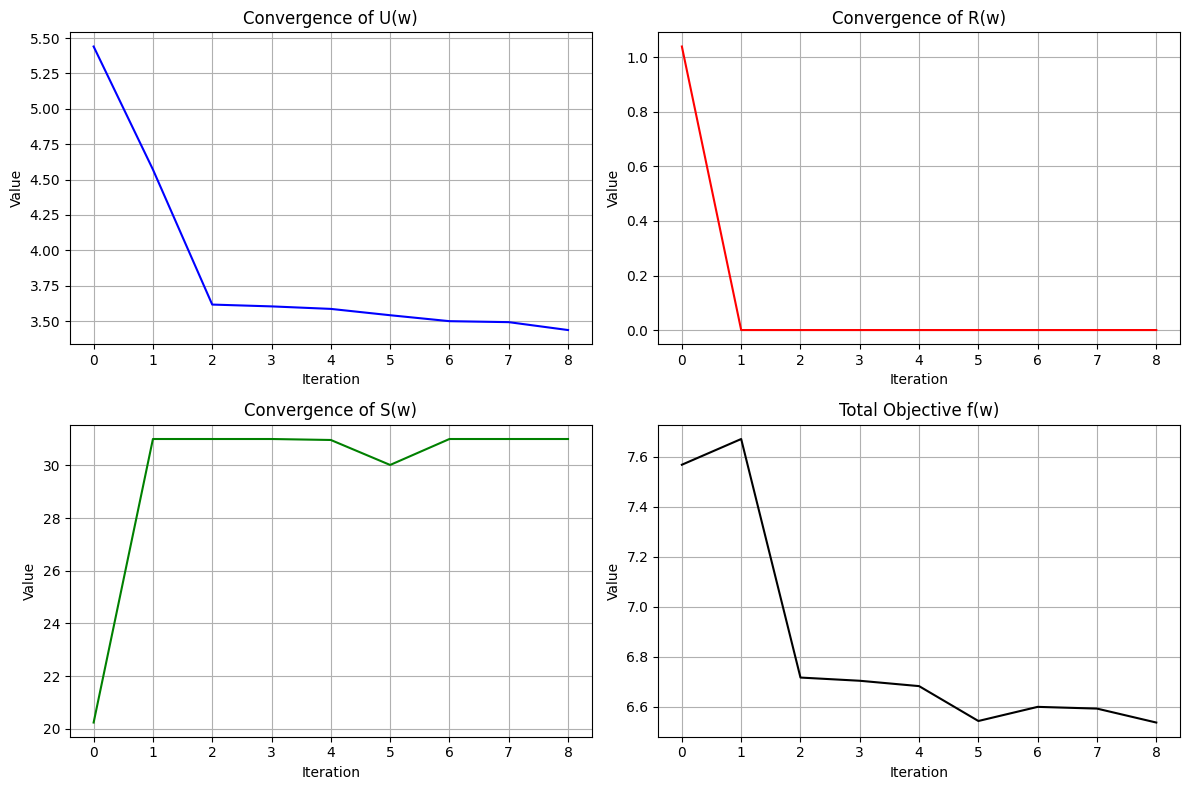

In [6]:
# Plot convergence
plt.figure(figsize=(12, 8))

# Plot U(w), R(w), S(w), and f(w)
plt.subplot(2, 2, 1)
plt.plot(result_pairs_OPTICS['history']['U'], label='U(w)', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of U(w)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(result_pairs_OPTICS['history']['R'], label='R(w)', color='red')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of R(w)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(result_pairs_OPTICS['history']['S'], label='S(w)', color='green')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of S(w)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(result_pairs_OPTICS['history']['f'], label='f(w)', color='black')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Total Objective f(w)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
optimal_weights_pairs_category , result_pairs_category = portfolio.get_strategy_weights(pairs_data=pairs_category)

with open('/Users/zahraaghaei/Desktop/PairsTrading_master/data/new_pickle/optimal_weights_dict_pairs_category', 'wb') as f:
    pickle.dump(optimal_weights_pairs_category, f)
    
optimal_weights_pairs_category

{'T_FOXA': 0.0,
 'CTL_IPG': 0.0,
 'IPG_OMC': 0.0,
 'MMM_SWK': 0.0,
 'MMM_WM': 0.0,
 'AME_PNR': 0.0,
 'AME_ROP': 0.0,
 'AME_UNP': 0.0,
 'AME_WM': 0.0,
 'ADP_GWW': 0.0,
 'ADP_PNR': 0.0,
 'ADP_ROP': 0.0,
 'AVY_MAS': 0.0,
 'BA_FDX': 0.0,
 'BA_PCAR': 0.0,
 'BA_PAYX': 0.0,
 'BA_UAL': 0.0,
 'CTAS_URI': 0.0,
 'CSX_WM': 0.0,
 'CMI_DOV': 0.0,
 'CMI_WM': 0.0,
 'DE_EMR': 0.0,
 'DE_HON': 0.0,
 'DE_PH': 0.0,
 'DE_WM': 0.0,
 'DOV_PH': 0.0,
 'DOV_ROK': 0.0,
 'DOV_SWK': 0.0,
 'DOV_WM': 0.0,
 'ETN_PH': 0.0,
 'ETN_ROK': 0.0,
 'ETN_UPS': 0.0,
 'ETN_WM': 0.0,
 'EMR_PH': 0.0,
 'EMR_WM': 0.0,
 'EFX_PNR': 0.0,
 'EXPD_PCAR': 0.0,
 'FAST_GWW': 0.0,
 'FDX_IR': 0.0,
 'FDX_PCAR': 0.0,
 'FDX_PAYX': 0.0,
 'GE_TXT': 0.0,
 'GWW_JBHT': 0.0,
 'HON_ITW': 0.0,
 'HON_JCI': 0.0,
 'HON_NOC': 0.0,
 'HON_UPS': 0.0,
 'ITW_JCI': 0.0,
 'ITW_NOC': 0.0,
 'ITW_PNR': 0.0,
 'ITW_UPS': 0.0,
 'IR_PCAR': 0.0,
 'IR_PAYX': 0.0,
 'JBHT_PNR': 0.0,
 'JBHT_UNP': 0.0,
 'JCI_NOC': 0.0,
 'JCI_PNR': 0.0,
 'JCI_UPS': 0.0,
 'KSU_PNR': 0.0,
 'KSU_SNA

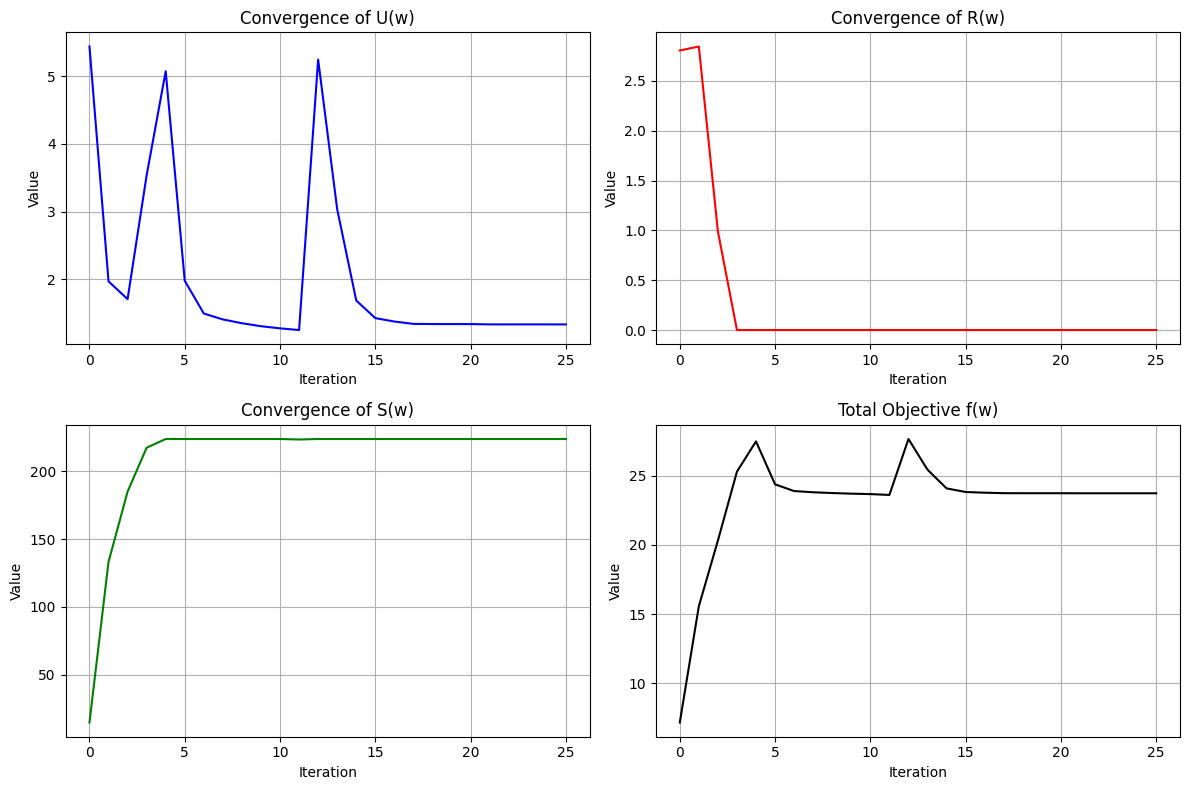

In [8]:
# Plot convergence
plt.figure(figsize=(12, 8))

# Plot U(w), R(w), S(w), and f(w)
plt.subplot(2, 2, 1)
plt.plot(result_pairs_category['history']['U'], label='U(w)', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of U(w)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(result_pairs_category['history']['R'], label='R(w)', color='red')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of R(w)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(result_pairs_category['history']['S'], label='S(w)', color='green')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of S(w)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(result_pairs_category['history']['f'], label='f(w)', color='black')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Total Objective f(w)')
plt.grid(True)

plt.tight_layout()
plt.show()